# ヒストグラムの作成(2)

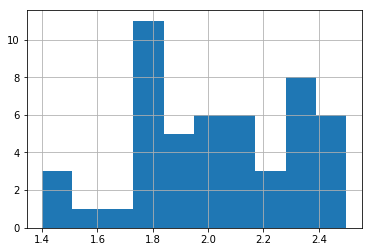

In [1]:
# pandasでIrisデータの読み込み
import pandas as pd
iris_df = pd.read_csv('03_iris.csv')
# グラフでインライン表示命令 & 必要なライブラリの読み込み
%matplotlib inline
import matplotlib.pyplot as plt
# Iris-virginica の PetalWidth をプロットしてみる
virginica_petal_width = iris_df[iris_df.Name == "Iris-virginica"].PetalWidth
virginica_petal_width.hist()

# ヒストグラムの作成(3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1142212b0>,
      dtype=object)

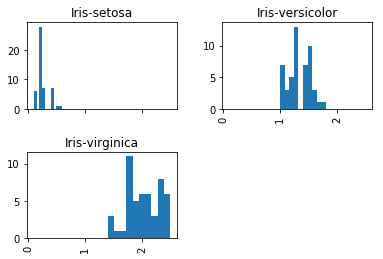

In [2]:
# PetalWidthとNameからなるデータフレームのサブセットを作成
petal_width_df = iris_df[["PetalWidth", "Name"]]
# histメソッドby引数を指定するとそれぞれ別エリアにぷろっとできる
# またsharrex引数で同じレンジのx軸を使用するか指定できる
petal_width_df.hist(by="Name", sharex = True)

# ヒストグラムの作成(4)

Name
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: PetalWidth, dtype: object

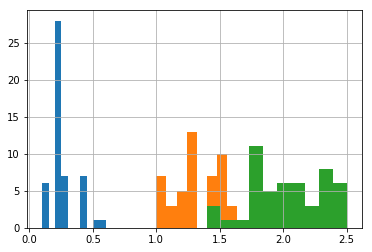

In [3]:
# groupby 後に　要素を選択した後 histメソッドを使用する
petal_width_df.groupby("Name").PetalWidth.hist()

# 棒グラフの作成(1)
・種類と数量の関係性を見たい場合は棒グラフを利用します
・基本的に種類をx軸、数量をy軸に撮ります

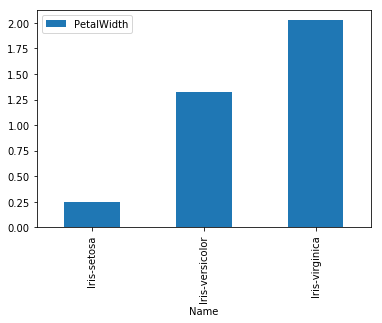

In [4]:
# 品種別 PetalWidth　平均値の比較
# kind 引数に barを指定することで棒グラフを描ける
petal_width_df.groupby("Name").mean().plot(kind="bar")

# 棒グラフの作成(2)

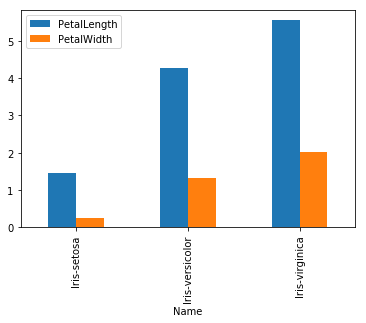

In [5]:
# PetalLength, PetalWidthとNameからなるデータフレーム作成
petal_df = iris_df[["PetalLength", "PetalWidth", "Name"]]

# 品種別 PetalLength, PetalWidth 平均値の比較
petal_df.groupby("Name").mean().plot(kind="bar")

# 散布図の作成(1)
・2つの数量の関係性を見たい場合は散布図を利用します。

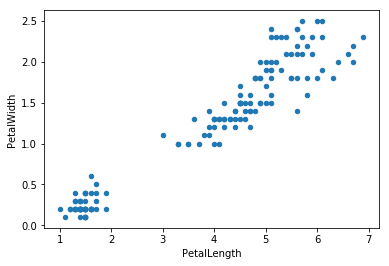

In [6]:
# kind 引数にscatterを指定することで散布図を描ける
# x, yそれぞれにx軸要素, y軸要素の名前を指定する
petal_df.plot(kind="scatter", x="PetalLength", y="PetalWidth")

# 散布図の作成(2)コード入力
・3品種別に描きます

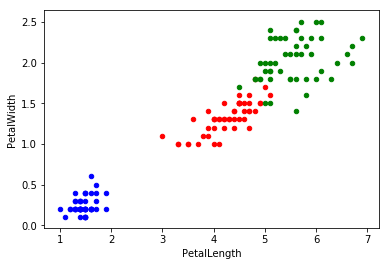

In [7]:
# 3品種別に描いてみる
p_setosa_df = petal_df[petal_df.Name == "Iris-setosa"]
p_versicolor_df =  petal_df[petal_df.Name == "Iris-versicolor"]
p_virginica_df =  petal_df[petal_df.Name == "Iris-virginica"]

# 1つの散布図Aを次の散布図Bに渡すには、plot関数の変数axに散布図Aを渡す。すると、同じグラフに重ねて描ける
A = p_setosa_df.plot(kind="scatter",  x="PetalLength", y="PetalWidth", color="blue")
B = p_versicolor_df.plot(kind="scatter",  x="PetalLength", y="PetalWidth", color="red", ax=A)
C = p_virginica_df.plot(kind="scatter",  x="PetalLength", y="PetalWidth", color="green", ax=B)

# 折れ線グラフの作成(1)
・時間と数量の関係性を見たい場合は折れ線グラフを利用する<br>
・基本的に時間をx軸に、数量をy軸に取ります。

# 折れ線グラフの作成(2)コード入力
・サンプル株価データの作成

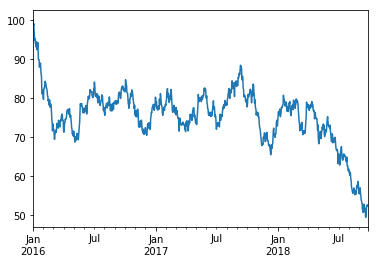

In [8]:
# 数値計算用ライブラリ numpy の読み込み
import numpy as np

# 擬似的な株価データ（＝ランダムウォーク）を生成してみる
# np.random.randn(1000)で平均0, 標準偏差1の乱数1000個を生成
# pd.data_range('2010-01-01', periods=1000)で'2010-01-01'から1000日分のラベル生成
#     => 毎日の株価変動
ts_a = 1.0 * pd.Series(np.random.randn(1000), index=pd.date_range('2016-01-01', periods=1000))

# 初期値を100として、ある日までの変化分をcumsum()メソッドで足し上げる(累積和)
stock_a_price = 100 + ts_a.cumsum()

# プロットしてみる
stock_a_price.plot(kind="line")

# 折れ線グラフの作成(3)

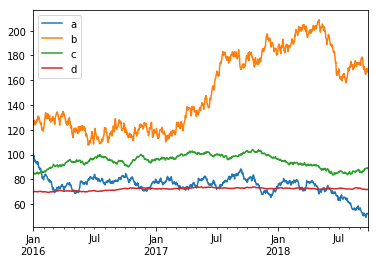

In [9]:
# 変化量と初期値が違うものをいくつか生成してみる
ts_b = 2 * pd.Series(np.random.randn(1000), index=pd.date_range('2016-01-01', periods=1000))
ts_c = 0.5 * pd.Series(np.random.randn(1000), index=pd.date_range('2016-01-01', periods=1000))
ts_d = 0.1 * pd.Series(np.random.randn(1000), index=pd.date_range('2016-01-01', periods=1000))
stock_b_price = 120 + ts_b.cumsum()
stock_c_price = 85 + ts_c.cumsum()
stock_d_price = 70 + ts_d.cumsum()

# DataFrameにする
stock_df = pd.DataFrame(
    {
        "a": stock_a_price,
        "b": stock_b_price,
        "c": stock_c_price,
        "d": stock_d_price
    },
    columns=["a", "b", "c", "d"]
)

# プロット
stock_df.plot(kind="line")

# 演習問題

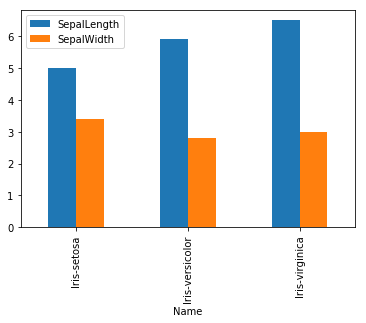

In [11]:
# irisデータの読み込み
iris_df = pd.read_csv("03_iris.csv")

# iris_dfの3つの列からなるデータフレームの作成
sepal_df = iris_df[["SepalLength", "SepalWidth", "Name"]]

# 品種("Name")別に"SepalLength", "SepalWidth"の中央値を棒グラフで表示
sepal_df.groupby("Name").median().plot(kind="bar")

In [19]:
sepal_df

,SepalLength,SepalWidth,Name
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
5,5.4,3.9,Iris-setosa
6,4.6,3.4,Iris-setosa
7,5.0,3.4,Iris-setosa
8,4.4,2.9,Iris-setosa
9,4.9,3.1,Iris-setosa


In [24]:
# 品種別 に色分けした"SepalLength", "SepalWidth"の散布図作成
# 3品種別　DataFrame作成
s_setosa_df = sepal_df[petal_df.Name == "Iris-setosa"]
s_versicolor_df = sepal_df[petal_df.Name == "Iris-versicolor"]
s_virginica_df = sepal_df[petal_df.Name == "Iris-virginica"]


In [25]:
s_setosa_df

,SepalLength,SepalWidth,Name
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
5,5.4,3.9,Iris-setosa
6,4.6,3.4,Iris-setosa
7,5.0,3.4,Iris-setosa
8,4.4,2.9,Iris-setosa
9,4.9,3.1,Iris-setosa


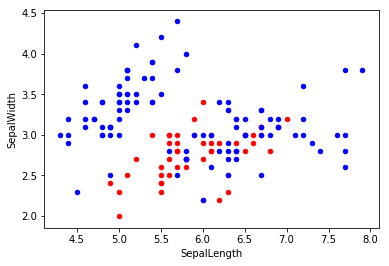

In [27]:
# plot関数の変数axに渡したい散布図を代入
A = s_setosa_df.plot(kind="scatter",  x="SepalLength", y="SepalWidth", color="blue")
B = s_versicolor_df.plot(kind="scatter", x="SepalLength", y="SepalWidth", color="red", ax=A)
s_virginica_df.plot(kind="scatter", x="SepalLength", y="SepalWidth", color="blue", ax=B)

# データがとれないと、エラーになる